***Data appendix***

Import packages

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

Get the data

In [118]:
survey = pd.read_csv("../Original_Data/earthquake_data.csv")
survey_cleaned = pd.read_csv("../Analysis_Data/earthquake_data_cleaned.csv")
survey_big_one = pd.read_csv("../Analysis_Data/earthquake_data_big_one.csv")
cols = [col for col in survey.columns]

Frequency tables and bar charts

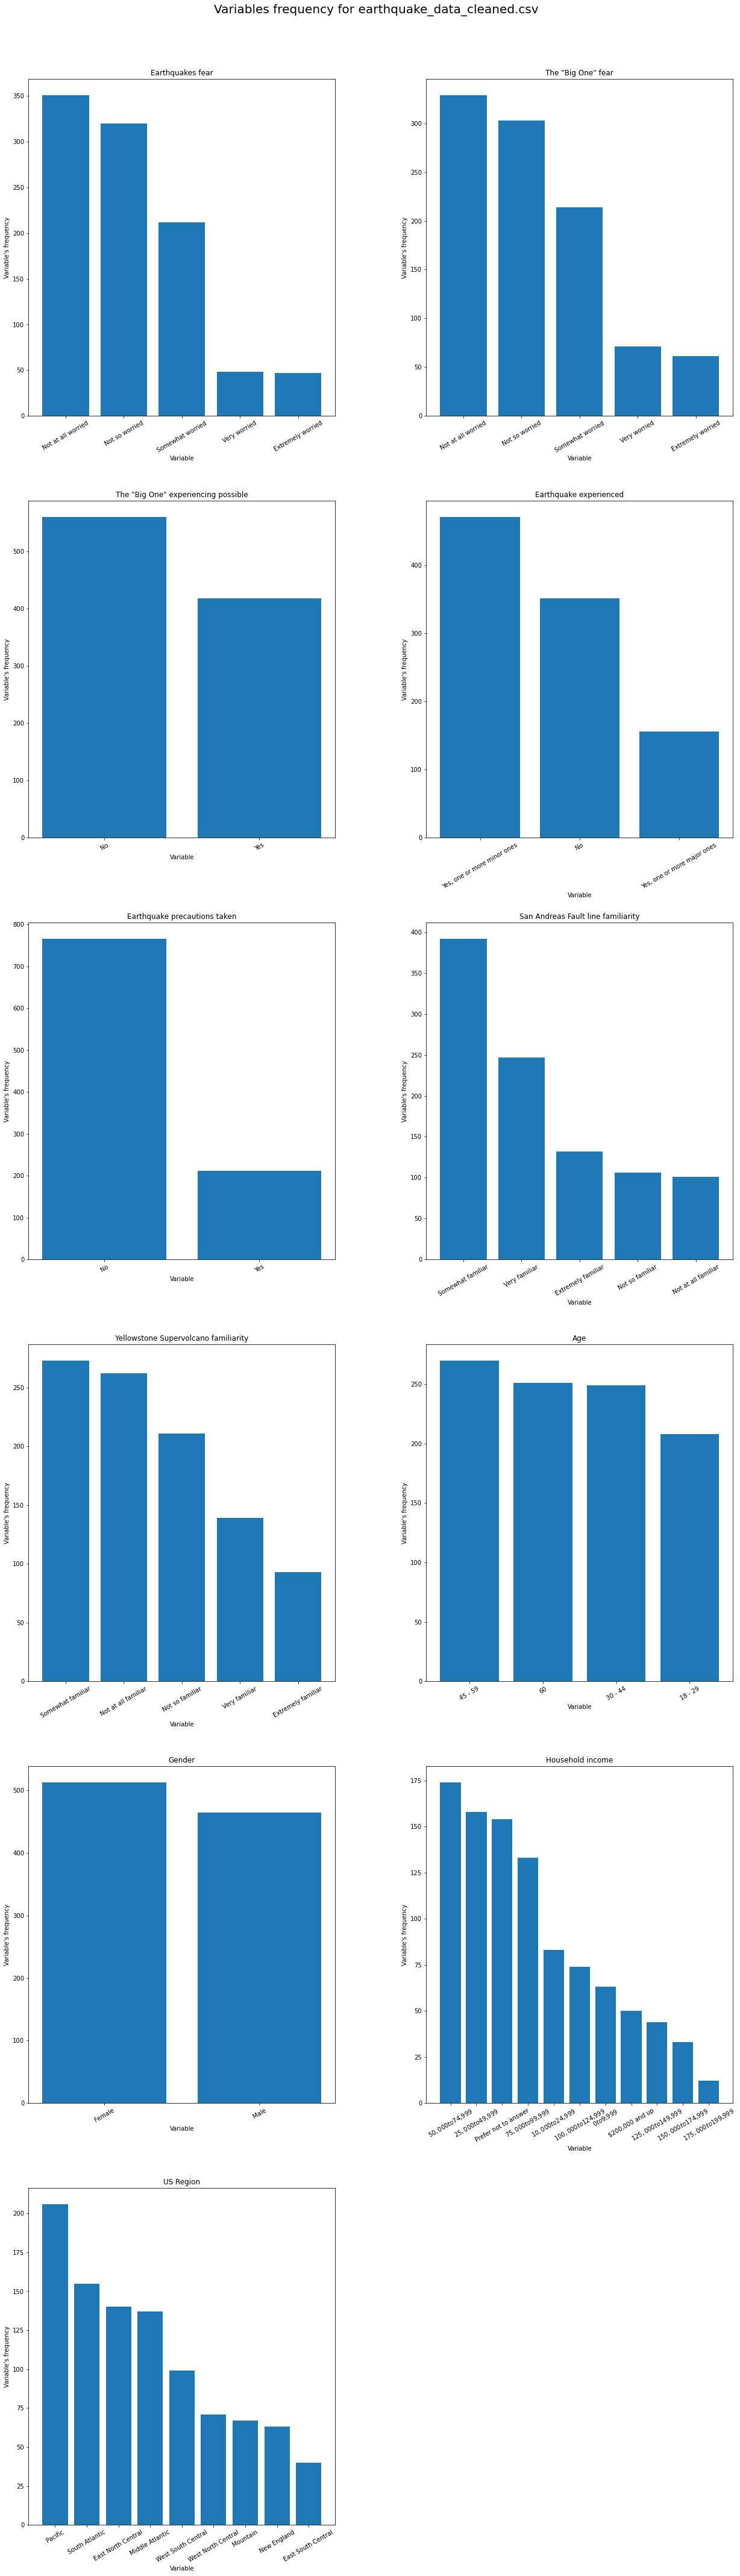

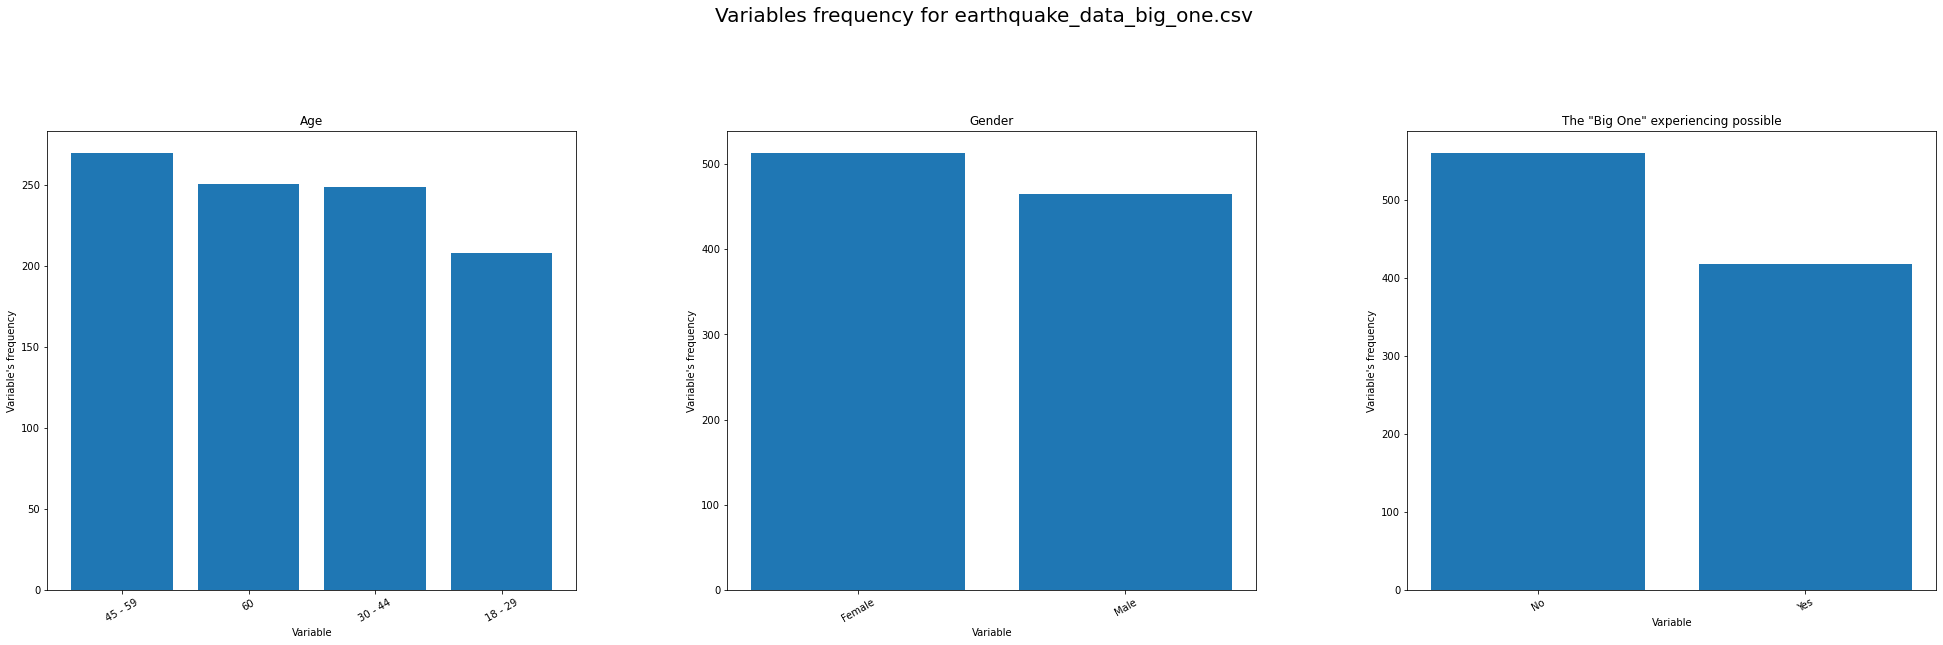

In [119]:
# Cleaned
n_missing = {col: list(survey[col].isnull().values).count(True) for col in cols}
n = len(survey.index)
txt = ""

fig_cleaned, ax_cleaned = plt.subplots(6, 2, figsize=(20, 60))
fig_cleaned.tight_layout(pad=12.0)
fig_cleaned.suptitle("Variables frequency for earthquake_data_cleaned.csv", fontsize=20, y=1.0)
ax_cleaned[-1, -1].axis('off')

for idx, col in enumerate(survey_cleaned):
    var_freq = survey_cleaned[col].value_counts().to_dict()
    m = n_missing[original_cols[idx]]
    txt += f"{idx + 1}. {col}\n"
    txt += f"Original name: {cols[idx]}, variable type: categorical, missing values: {m}:{n}, variables' frequency:\n"
    
    for v, f in var_freq.items():
        txt += f"{v}, frequency: {f}\n"
    
    # Horizontal labels
    var = list(var_freq.keys())
    freq = list(var_freq.values())
    ax_cleaned[idx//2, idx%2].bar(var, freq, tick_label=var)
    ax_cleaned[idx//2, idx%2].set_title(col)
    ax_cleaned[idx//2, idx%2].set_xlabel("Variable")
    ax_cleaned[idx//2, idx%2].set_ylabel("Variable's frequency")
    ax_cleaned[idx//2, idx%2].set_xticklabels(var, rotation=30)

# 'Big One'
txt += "\n"

fig_big_one, ax_big_one = plt.subplots(1, 3, figsize=(30, 10))
fig_big_one.tight_layout(pad=12.0)
fig_big_one.suptitle("Variables frequency for earthquake_data_big_one.csv", fontsize=20, y=1.0)
    
for idx, col in enumerate(survey_big_one):
    var_freq = survey_big_one[col].value_counts().to_dict()
    m = n_missing[original_cols[idx]]
    txt += f"{idx + 1}. {col}\n"
    txt += f"Original name: {cols[idx]}, variable type: categorical, missing values: {m}:{n}, variables' frequency:\n"
    
    for v, f in var_freq.items():
        txt += f"{v}, frequency: {f}\n"
    
    # Horizontal labels
    var = list(var_freq.keys())
    freq = list(var_freq.values())
    ax_big_one[idx].bar(var, freq, tick_label=var)
    ax_big_one[idx].set_title(col)
    ax_big_one[idx].set_xlabel("Variable")
    ax_big_one[idx].set_ylabel("Variable's frequency")
    ax_big_one[idx].set_xticklabels(var, rotation=30)
    
plt.show()

Save the bar charts to .png files

In [120]:
with PdfPages("../Documents/Data_Appendix_Output/earthquake_data_cleaned_freq.pdf") as pdf:
    pdf.savefig(fig_cleaned)
    
with PdfPages("../Documents/Data_Appendix_Output/earthquake_data_big_one_freq.pdf") as pdf:
    pdf.savefig(fig_big_one)

with open("../Documents/Data_Appendix_Output/data_appendix_report.txt", "w") as f:
    f.write(txt)